In [23]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.fftpack import fft,ifft
import mysignals as sigs
%matplotlib inline
style.use('ggplot')
plt.rcParams['figure.figsize'] = [20,18]
plt.rcParams.update({'font.size':18})

## Import the signal

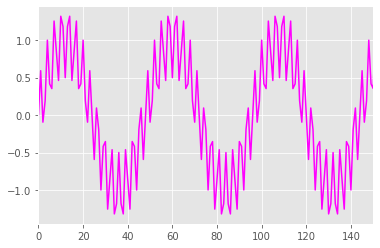

In [6]:
signal = sigs.InputSignal_1kHz_15kHz
plt.xlim(0,150)
plt.plot(signal,color='magenta')


In [7]:
signal = sigs.InputSignal_1kHz_15kHz
noisy_signal = signal + 1.5*np.random.randn(len(signal))

## Displaying the Noise and Clean signal

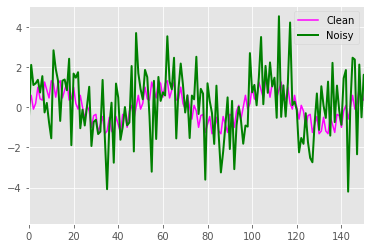

In [11]:
plt.xlim(0,150)
plt.plot(signal,color='magenta',LineWidth=1.5,label='Clean')
plt.plot(noisy_signal,color='green',LineWidth=2,label='Noisy')
plt.legend()
plt.show()

## Display the first FFT result

/home/asus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


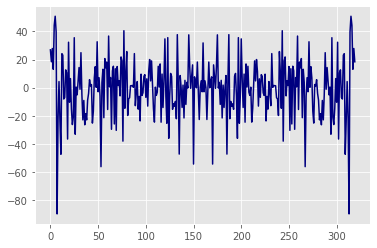

In [12]:
freq_domain = fft(noisy_signal)
plt.plot(freq_domain,color='navy',LineWidth=1.5)
plt.show()

## Computing the Power Spectrum Density 

/home/asus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


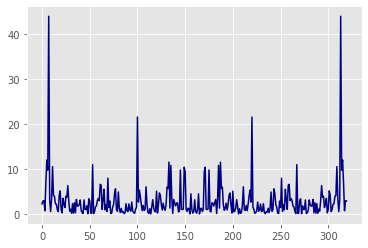

In [13]:
PSD = freq_domain*np.conj(freq_domain)/len(freq_domain)
plt.plot(PSD,color='navy',LineWidth=1.5)
plt.show()

## Filtering the Spectrum

/home/asus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


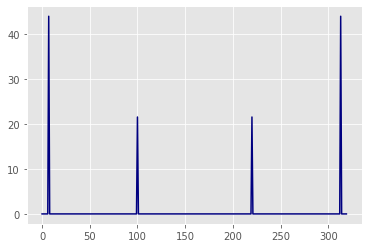

In [14]:
indices = PSD >= 20       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others


PSD = freq_domain*np.conj(freq_domain)/len(freq_domain)
plt.plot(PSDclean,color='navy',LineWidth=1.5)
plt.show()


/home/asus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


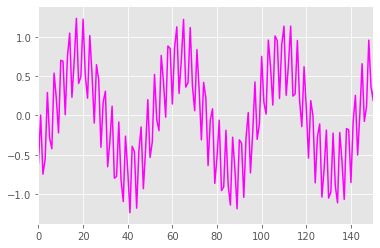

In [19]:
freq_domain = indices * freq_domain    # Zero out small Fourier coeffs. in Y
ffilt = ifft(freq_domain) # Inverse FFT for filtered time signal
plt.xlim(0,150)
plt.plot(ffilt,color='magenta')

## Displayin the final results

/home/asus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/asus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/asus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


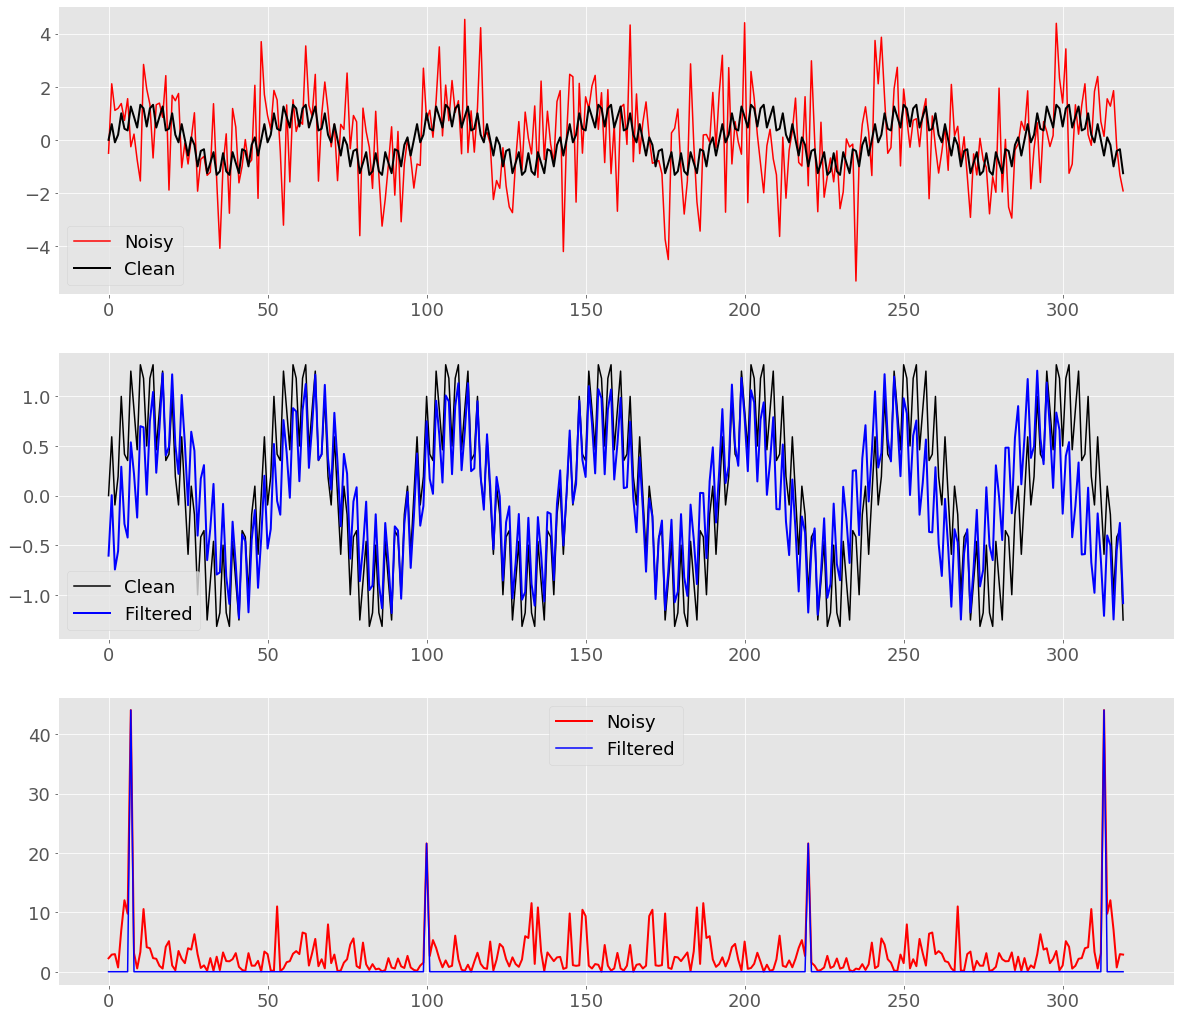

In [24]:
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(noisy_signal,color='r',LineWidth=1.5,label='Noisy')
plt.plot(signal,color='k',LineWidth=2,label='Clean')
plt.legend()

plt.sca(axs[1])
plt.plot(signal,color='k',LineWidth=1.5,label='Clean')
plt.plot(ffilt,color='b',LineWidth=2,label='Filtered')
plt.legend()

plt.sca(axs[2])
plt.plot(PSD,color='r',LineWidth=2,label='Noisy')
plt.plot(PSDclean,color='b',LineWidth=1.5,label='Filtered')
plt.legend()

plt.show()